<a href="https://colab.research.google.com/github/das109/lecture/blob/main/KTL%EB%A7%88%ED%81%AC_%EA%B4%80%EB%A0%A8_%EC%A0%95%EB%B3%B4_%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (14.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


## 런타임 다시 시작  
데이터 다운로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'cmss10',
 'DejaVu Sans',
 'STIXGeneral',
 'cmb10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmr10',
 'cmmi10',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'cmsy10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmex10',
 'NanumGothic',
 'NanumBarunGothic',
 'Liberation Mono',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Serif',
 'NanumSquareRound',
 'NanumBarunGothic',
 'Liberation Sans Narrow',
 'NanumGo

In [4]:
src_path = "/content/drive/MyDrive/data/csv_tb_kl_klmrk_crt_m.csv"
src_df = pd.read_csv(src_path, encoding='euc-kr', engine='python')

src_df['접수일자'] = src_df['접수일자'].astype(str)
src_df['year'] = [x[0:4] for x in src_df['접수일자']]

src_df.head()

,개별접수번호,사업구분명,접수일자,처리일수,단위사업중분류명,단위사업소분류명,year
0,1212-08-0000001,디지털산업,20121218,0.0,KTL마크인증,KTL마크인증 성능시험,2012
1,1901-08-0000002,기간산업,20190128,NaN,KTL마크인증,KTL마크인증 적합성시험,2019
2,1901-08-0000003,기간산업,20190131,NaN,KTL마크인증,KTL마크인증 SW평가 및 인증,2019
3,1901-08-0000004,기간산업,20190131,NaN,KTL마크인증,KTL마크인증 적합성시험,2019
4,1901-08-0000005,디지털산업,20190109,26.0,KTL마크인증,KTL마크인증 성능시험,2019


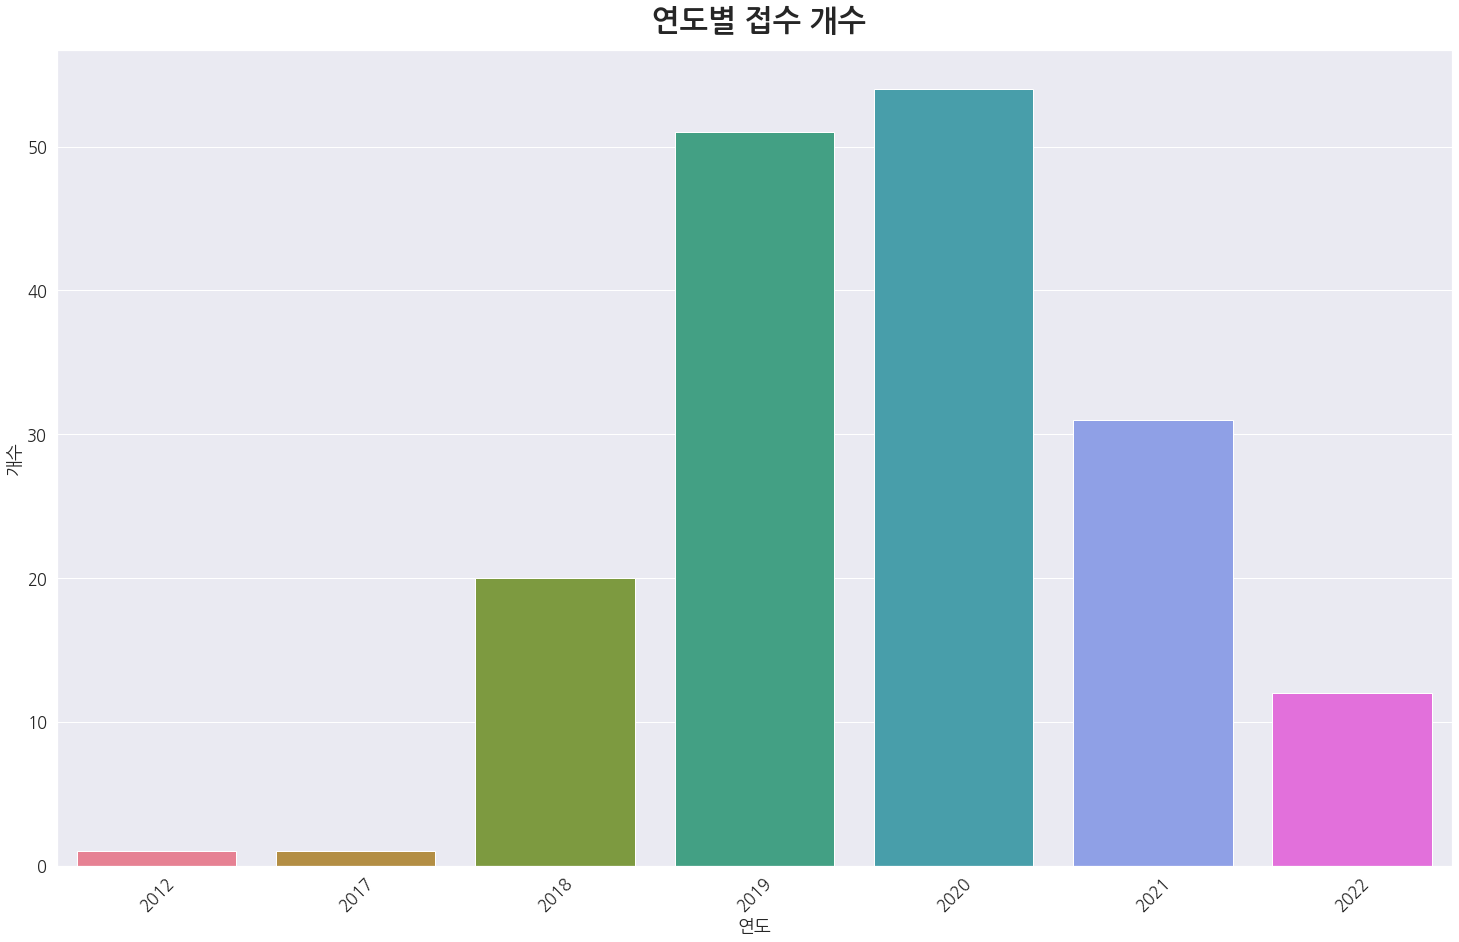

In [5]:
year_count = src_df['year'].value_counts().reset_index(name='rank')
year_count.columns = ['연도', '개수']

year_count['연도'] = year_count['연도'].astype(int)
year_count = year_count.sort_values(by = '연도')

    
sns.set(rc = {'figure.figsize':(25,15)})
plt.figure()
sns.set(rc = {'figure.figsize':(25,15)})
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
plt.rcParams['font.family'] = 'NanumGothic'
plt.title(" 연도별 접수 개수", y=1, fontsize = 30, fontweight="bold", loc='center', pad=20)
plt.xticks(rotation=45)
sns.barplot(x=year_count['연도'], y=year_count['개수'], palette="husl")

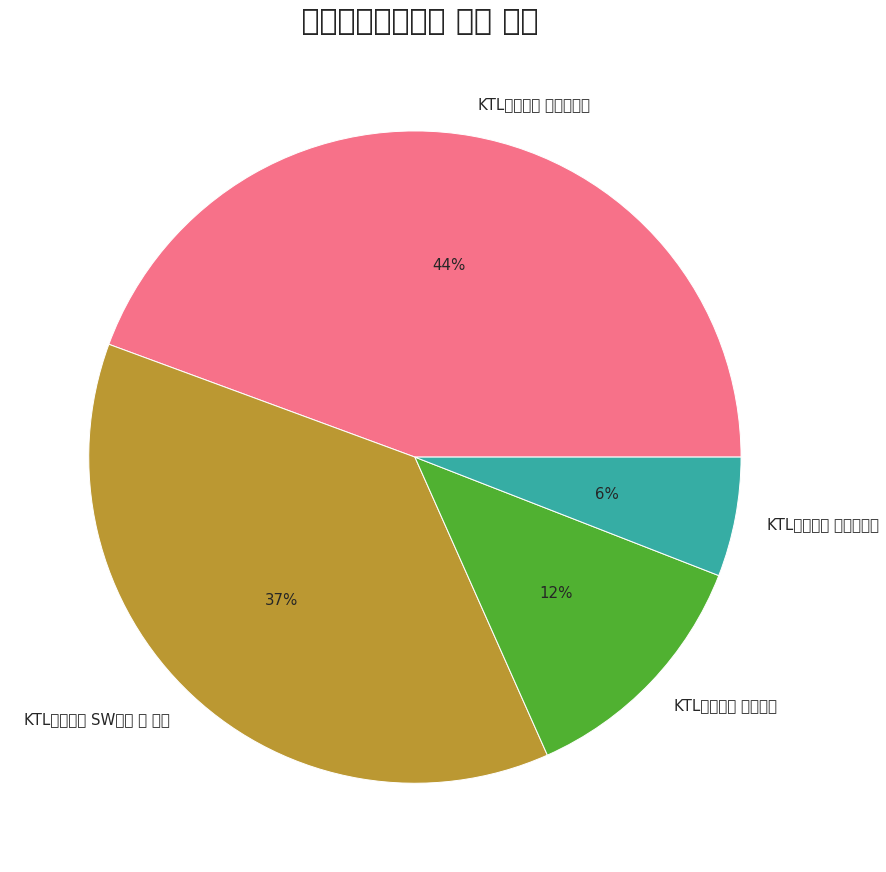

In [11]:
class_count = src_df['단위사업소분류명'].value_counts().reset_index(name='count')
class_count.columns = ['class', 'count']
index = class_count[class_count['count'] < (len(src_df)*0.01)].index # 2% 미만을 삭제
class_count = class_count.drop(index)
plt.figure()
sns.set(rc = {'figure.figsize':(25,15)})
colors = sns.color_palette("husl")
plt.rcParams['font.family'] = 'NanumGothic'
plt.title(" 단위사업소분류명 분포 현황", y=1, fontsize = 30, fontweight="bold", loc='center', pad=20)
plt.pie(class_count['count'], labels = class_count['class'], colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.show()

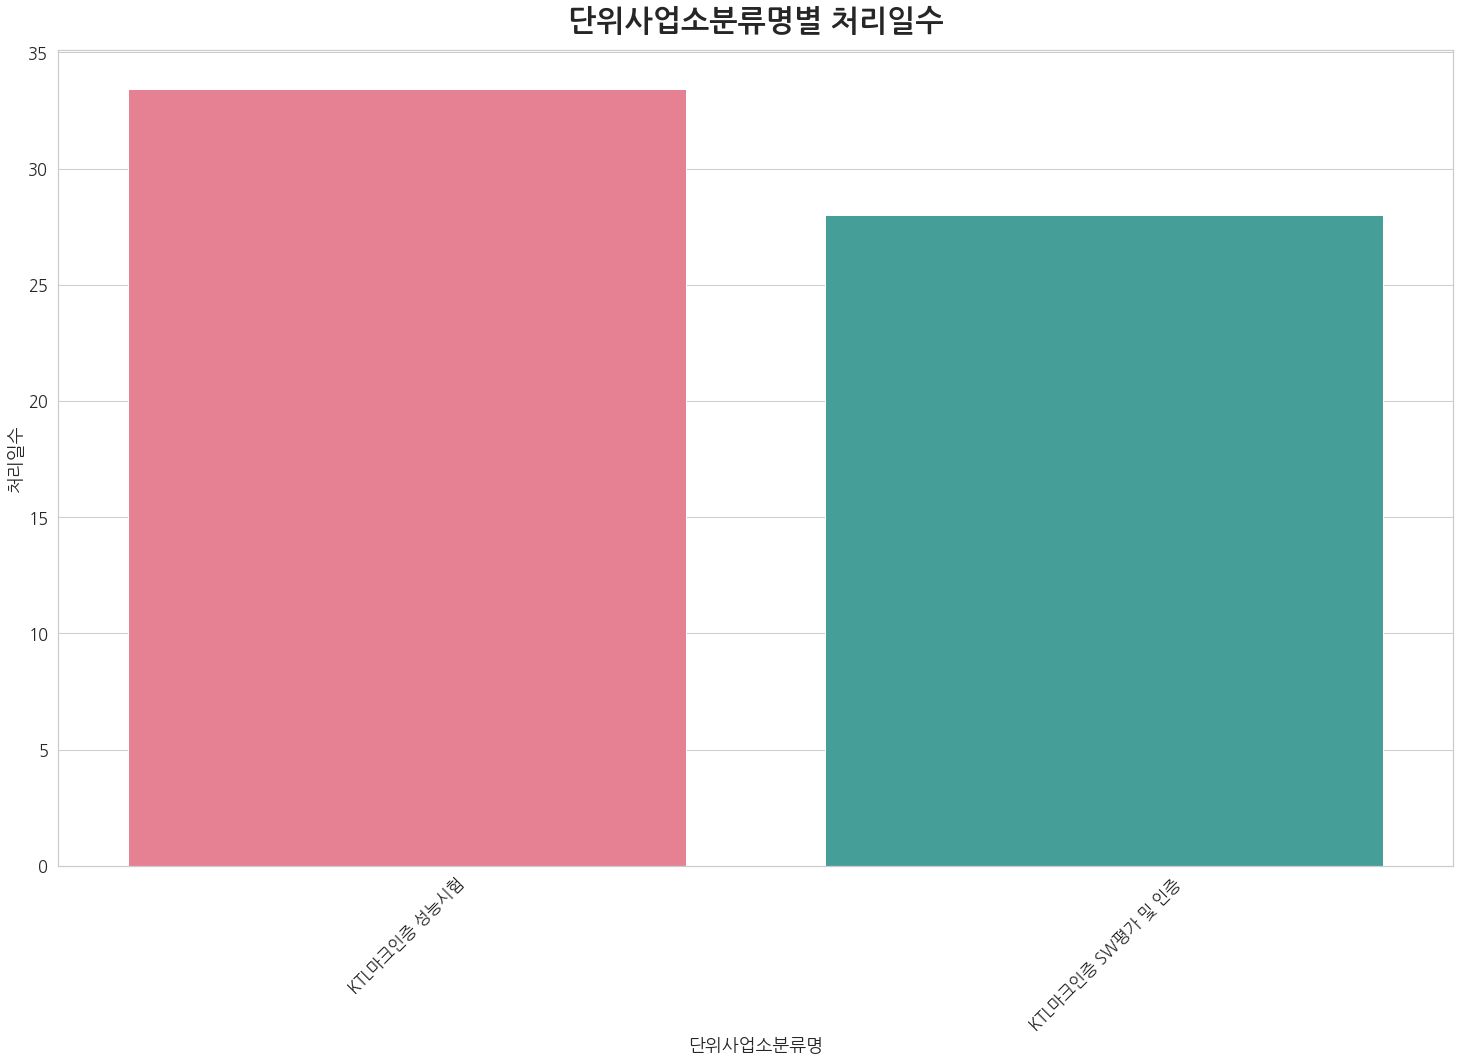

In [ ]:
day_count = src_df.groupby('단위사업소분류명', as_index=False).agg({'개별접수번호' : 'count', '처리일수' : 'mean'})
index = day_count[day_count['개별접수번호'] < (len(src_df)*0.01)].index # 2% 미만을 삭제
day_count = day_count.drop(index)
day_count = day_count.dropna(axis=0)
day_count = day_count.sort_values(by = '처리일수',  ascending=False)
plt.figure()
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'
plt.title("단위사업소분류명별 처리일수", y=1, fontsize = 30, fontweight="bold", loc='center', pad=20)
plt.xticks(rotation=45)
sns.barplot(x=day_count['단위사업소분류명'], y=day_count['처리일수'], palette="husl")

# 전기차 충전기 

데이터 다운로드

In [ ]:
file_path = '/content/drive/MyDrive/data/한국환경공단_전기차 충전기 현황_환경부 공공급속충전기_20200629.csv'
df = pd.read_csv(file_path, encoding='cp949')

print(df.shape)
print("------------------------------------")
print(df.info())

(3773, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      3773 non-null   object
 1   충전소명    3773 non-null   object
 2   충전기ID   3773 non-null   int64 
 3   설치년도    3773 non-null   int64 
 4   주소      3773 non-null   object
dtypes: int64(2), object(3)
memory usage: 147.5+ KB
None


In [ ]:
df.head()

,지역,충전소명,충전기ID,설치년도,주소
0,서울특별시,종묘 공영주차장,1,2012,"서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역"
1,서울특별시,세종로 공영주차장,1,2014,"서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞"
2,서울특별시,그랜드앰배서더 서울,1,2014,"서울특별시 중구 동호로 287, 대형버스주차장"
3,서울특별시,한강진역 공영주차장,1,2012,"서울특별시 용산구 한남동 산10-84, 지상실외주차장"
4,서울특별시,기아차 성동서비스센터,1,2012,"서울특별시 성동구 성수이로26길 61, 지상주차장 입구 좌측 경비실 옆"


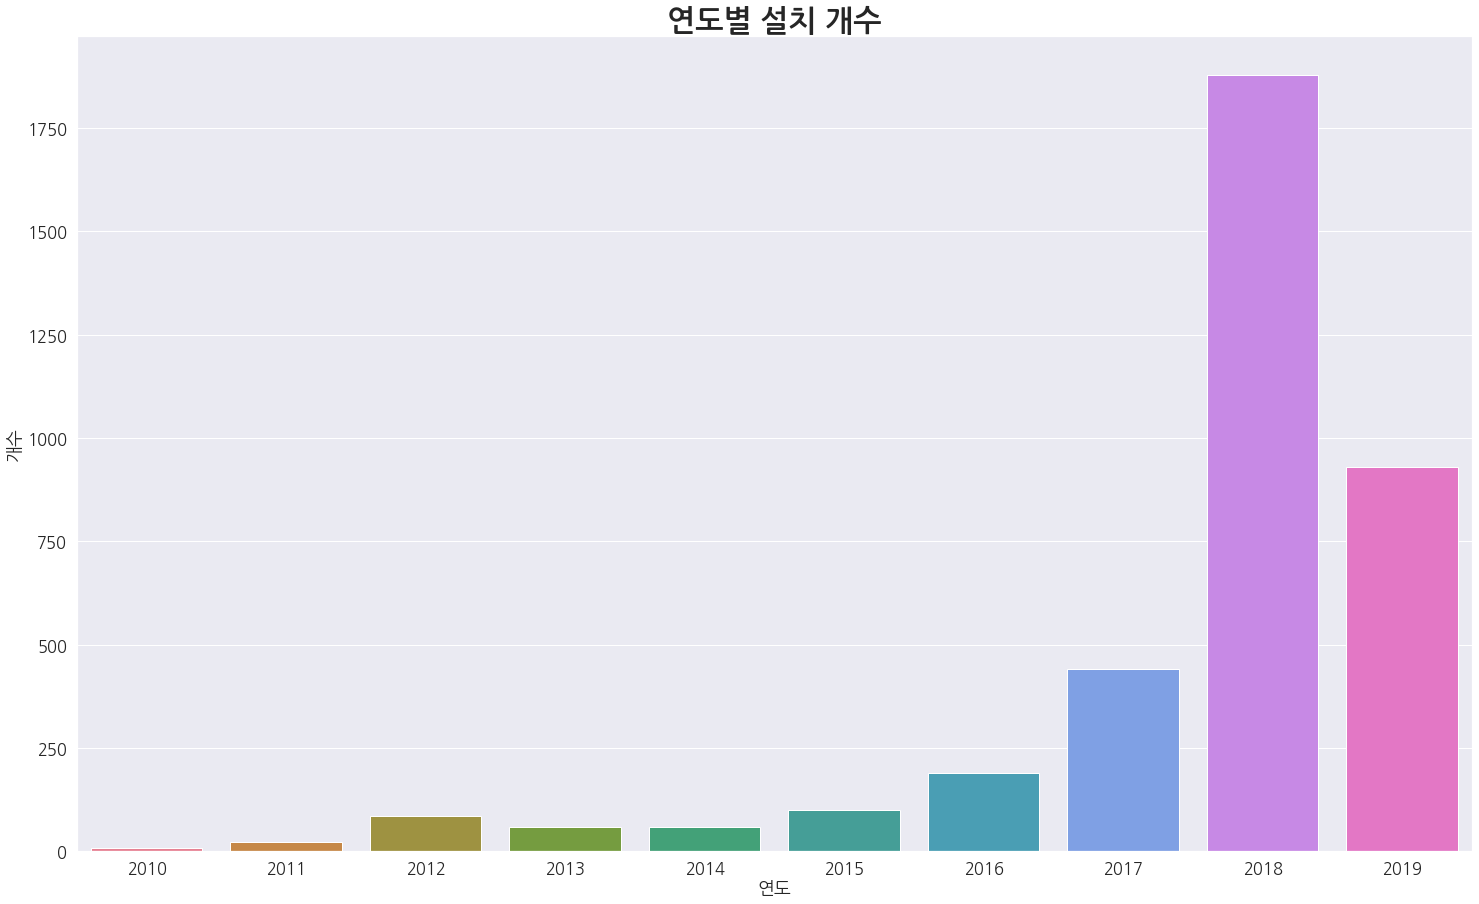

In [ ]:
year_count = df['설치년도'].value_counts().reset_index(name='rank')
year_count.columns = ['연도', '개수']
year_count['연도'] = year_count['연도'].astype(int)
year_count = year_count.sort_values(by = '연도')
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale = 1.5)
plt.rcParams['font.family'] = 'NanumGothic'
plt.title("연도별 설치 개수", y=1, fontsize = 30, fontweight="bold")
sns.barplot(x=year_count['연도'], y=year_count['개수'], palette="husl")

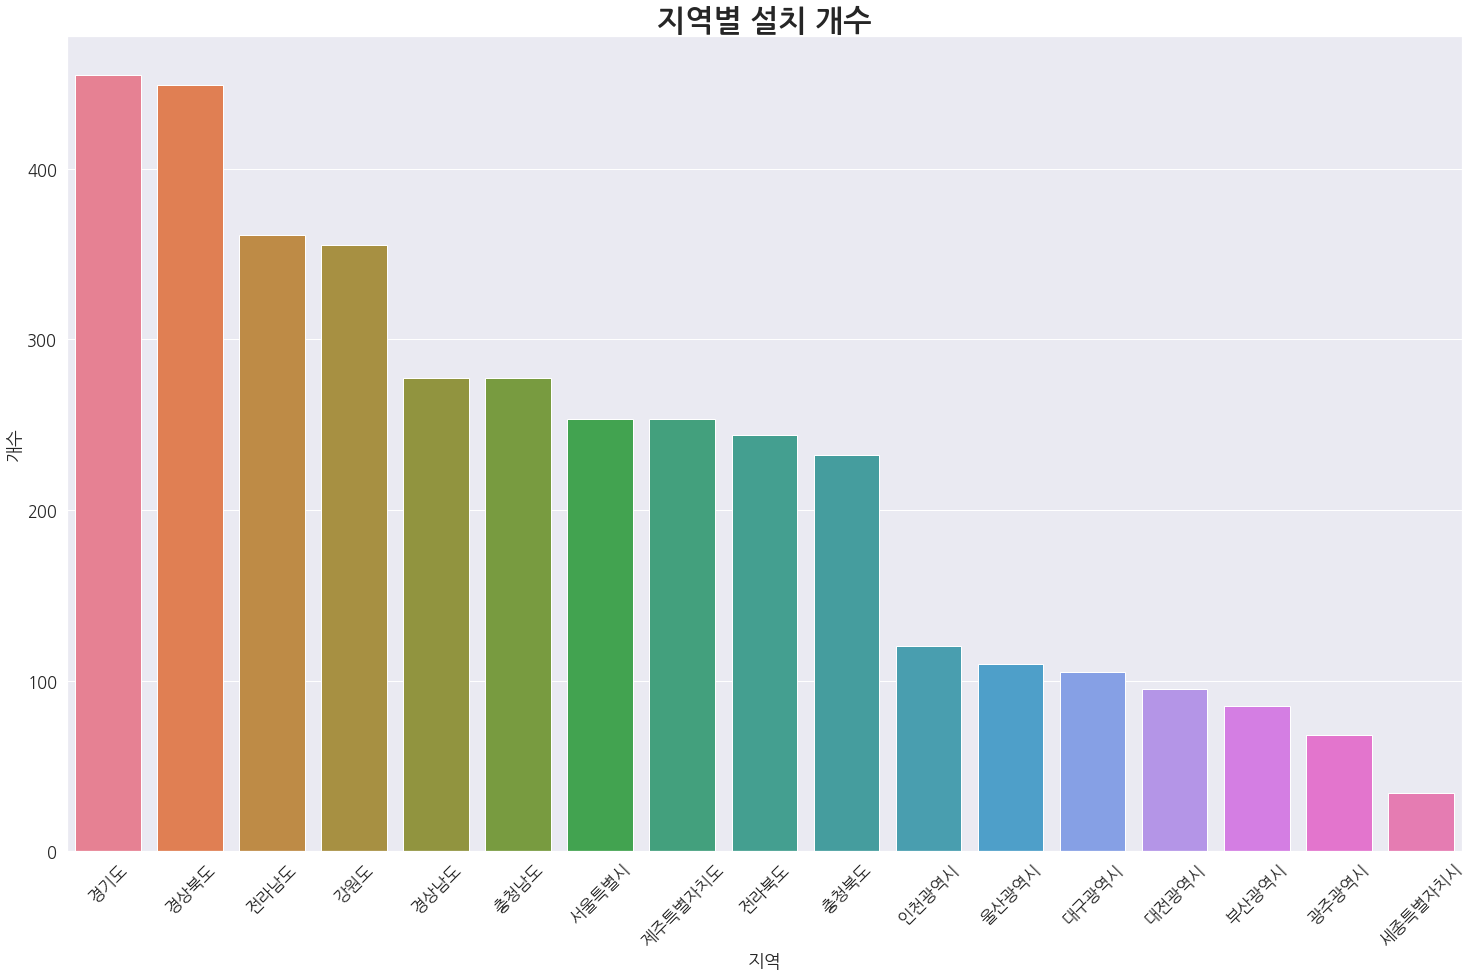

In [ ]:
region_count = df['지역'].value_counts().reset_index(name='rank')
region_count.columns = ['지역', '개수']
sns.set(rc = {'figure.figsize':(25,15)})
sns.set(font_scale = 1.5)
plt.rcParams['font.family'] = 'NanumGothic'
plt.title("지역별 설치 개수", y=1, fontsize = 30, fontweight="bold")
plt.xticks(rotation=45)
sns.barplot(x=region_count['지역'], y=region_count['개수'], palette="husl")